# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe scikit-learn matplotlib

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.


ERROR: Could not find a version that satisfies the requirement typing-extensions~=3.7.4 (from tensorflow) (from versions: none)
ERROR: No matching distribution found for typing-extensions~=3.7.4


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results): 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

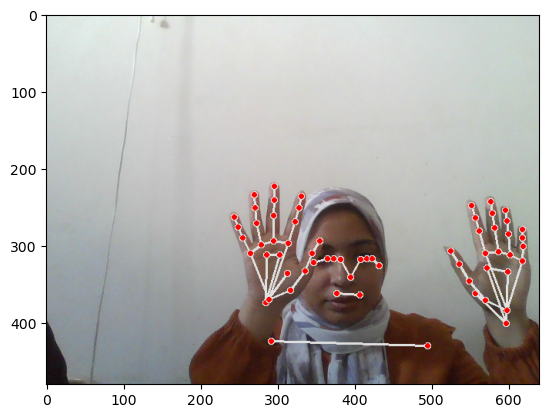

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 6.18022084e-01,  7.10641980e-01, -6.31196022e-01,  9.99959230e-01,
        6.38345003e-01,  6.62795484e-01, -5.76115966e-01,  9.99952197e-01,
        6.50160134e-01,  6.62206292e-01, -5.76230288e-01,  9.99956608e-01,
        6.61688209e-01,  6.62400484e-01, -5.76256514e-01,  9.99953687e-01,
        5.98225951e-01,  6.62974477e-01, -5.95011115e-01,  9.99937713e-01,
        5.83389521e-01,  6.62204802e-01, -5.94220519e-01,  9.99936759e-01,
        5.70343614e-01,  6.61778629e-01, -5.94593465e-01,  9.99927223e-01,
        6.75149798e-01,  6.80320561e-01, -2.09098890e-01,  9.99969363e-01,
        5.43383837e-01,  6.72503769e-01, -2.63453901e-01,  9.99948144e-01,
        6.37394488e-01,  7.59468198e-01, -4.94942278e-01,  9.99958813e-01,
        5.90385079e-01,  7.55878150e-01, -5.21628201e-01,  9.99941468e-01,
        7.74402976e-01,  8.96942914e-01, -1.96115881e-01,  9.99580443e-01,
        4.57595736e-01,  8.84702444e-01, -1.40394986e-01,  9.96684492e-01,
        1.02632737e+00,  

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 6.18022084e-01,  7.10641980e-01, -6.31196022e-01,  9.99959230e-01,
        6.38345003e-01,  6.62795484e-01, -5.76115966e-01,  9.99952197e-01,
        6.50160134e-01,  6.62206292e-01, -5.76230288e-01,  9.99956608e-01,
        6.61688209e-01,  6.62400484e-01, -5.76256514e-01,  9.99953687e-01,
        5.98225951e-01,  6.62974477e-01, -5.95011115e-01,  9.99937713e-01,
        5.83389521e-01,  6.62204802e-01, -5.94220519e-01,  9.99936759e-01,
        5.70343614e-01,  6.61778629e-01, -5.94593465e-01,  9.99927223e-01,
        6.75149798e-01,  6.80320561e-01, -2.09098890e-01,  9.99969363e-01,
        5.43383837e-01,  6.72503769e-01, -2.63453901e-01,  9.99948144e-01,
        6.37394488e-01,  7.59468198e-01, -4.94942278e-01,  9.99958813e-01,
        5.90385079e-01,  7.55878150e-01, -5.21628201e-01,  9.99941468e-01,
        7.74402976e-01,  8.96942914e-01, -1.96115881e-01,  9.99580443e-01,
        4.57595736e-01,  8.84702444e-01, -1.40394986e-01,  9.96684492e-01,
        1.02632737e+00,  

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data333') 

# Actions that we try to detect
actions = np.array(['stop', 'like', 'dislike'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'stop': 0, 'like': 1, 'dislike': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 258)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 258)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
def create_model(optimizer='adam', units=64, activation='relu'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, activation=activation, input_shape=(30,258)))
    model.add(LSTM(units*2, return_sequences=True, activation=activation))
    model.add(LSTM(units, return_sequences=False, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
res = [.7, 0.2, 0.1]

In [42]:
actions[np.argmax(res)]

'stop'

In [43]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [44]:
# Define hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'units': [64, 128],
    'activation': ['relu', 'tanh']
}

In [45]:
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [46]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.376437 using {'activation': 'tanh', 'optimizer': 'rmsprop', 'units': 64}


In [47]:
# Get the best model from grid search
best_model = grid_result.best_estimator_

In [48]:
# Compile the best model
best_model.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the best model
tb_callback = TensorBoard(log_dir=log_dir)
best_model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [50]:
from sklearn.model_selection import train_test_split

# Split your original dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
history = best_model.fit(X_train, y_train, epochs=2000, validation_data=(X_val, y_val))

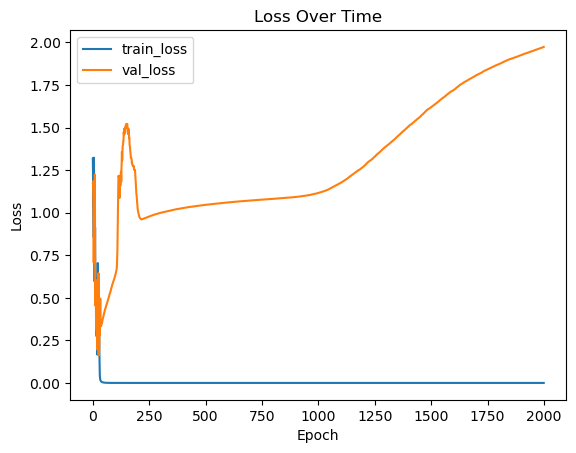

In [52]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

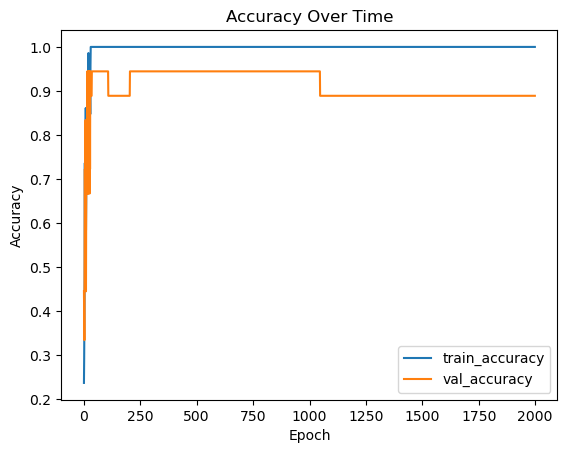

In [53]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

In [54]:
best_model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            82688     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 237,251
Trainable params: 237,251
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [55]:
res = best_model.model.predict(X_test)

In [57]:
actions[np.argmax(res[4])]

'stop'

In [58]:
actions[np.argmax(y_test[4])]

'stop'

# 9. Save Weights

In [59]:
best_model.model.save('action222.h5')

In [61]:
best_model.model.load_weights('action222.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [62]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [63]:
yhat = best_model.model.predict(X_test)

In [64]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [67]:
 from tensorflow.keras.models import load_model

In [15]:
 best_model = load_model('C:\\Users\\Dell G5 15\\Sign-Language-Recognition\\action.h5')

In [16]:
 best_model.model = load_model('C:\\Users\\Dell G5 15\\Sign-Language-Recognition\\action.h5')

In [17]:
 actions = ['stop', 'like', 'dislike']

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Check if res is a single probability value
    if not isinstance(res, np.ndarray):
        res = np.array([res])  # Convert single value to array
    
    for num, prob in enumerate(res):
        # Check if num is within the range of colors
        if num < len(colors):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        else:
            print("Warning: Not enough colors provided for visualization.")
            break

    return output_frame

In [69]:
print(type(sequence))

<class 'int'>


In [71]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)

        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = best_model.model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [72]:
cap.release()
cv2.destroyAllWindows()

In [73]:
res[np.argmax(res)] > threshold

True

In [74]:
(None,30,258)

(None, 30, 258)

In [75]:
best_model.model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.2282243e-09, 1.0000000e+00, 1.5094456e-09]], dtype=float32)

In [76]:
pip list

Package                      Version
---------------------------- -------------------
absl-py                      0.15.0
aiohttp                      3.9.3
aiosignal                    1.2.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astor                        0.8.1
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
blinker                      1.6.2
bokeh                        3.1.1
Bottleneck                   1.3.5
Brotli                       1.0.9
cachetools                   4.2.2
category-encoders            2.6.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
click                        